## **Lane Detection using Edge Detection and Hough Transform**

## Import Packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import pickle
%matplotlib inline

## Read in an Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


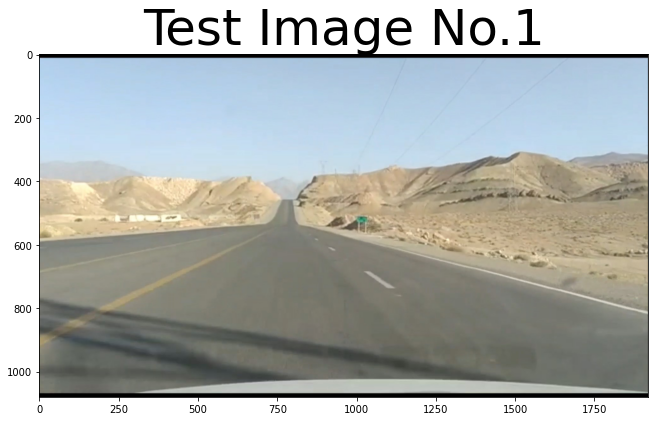

In [27]:
#reading an image
image = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/Image Processing/test_images/f.jpg')
img_size = (image.shape[1], image.shape[0])

fig = plt.figure(figsize=(24, 9))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image)
ax1.set_title('Test Image No.1',fontsize=50)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

In [6]:
## loading up the distortion coefficients from the Camera Calibration code results
#Radial distortion occurs when light rays bend more near the edges of a lens than they do at its optical center. The smaller the lens, the greater the distortion. 
dist_pickle = pickle.load( open( "/content/drive/MyDrive/Colab Notebooks/Image Processing/camera_cal/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

Text(0.5, 1.0, 'Undistorted Image')

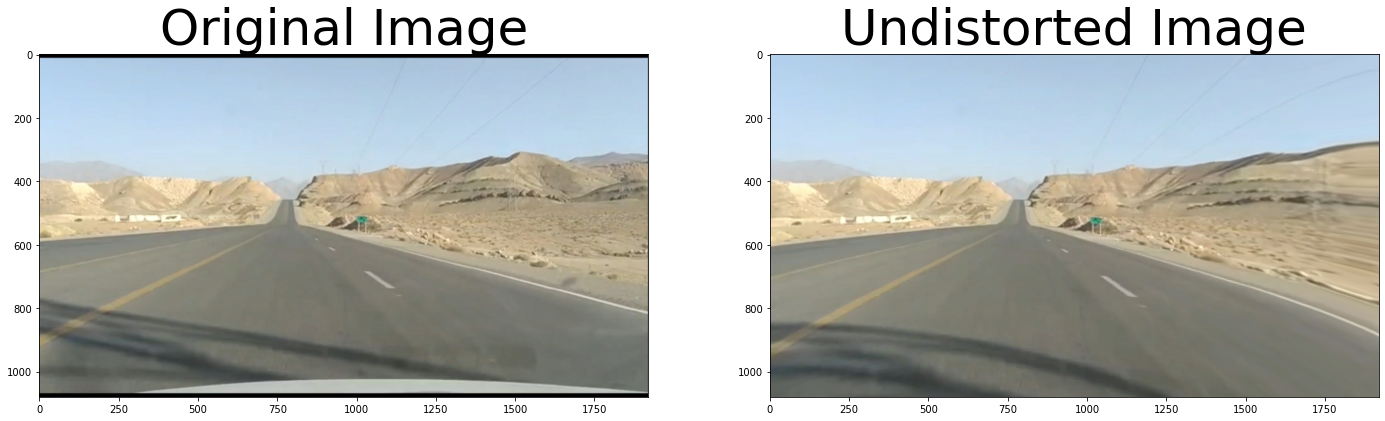

In [28]:
# undistort function using the imported distortion coefficients
def undist(img, mtx, dist):
    undist_image= cv2.undistort(img,mtx,dist,None,mtx)
    return undist_image


undist_img = undist (image, mtx, dist)
fig = plt.figure(figsize=(24, 9))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image)
ax1.set_title('Original Image',fontsize=50)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(undist_img)
ax2.set_title('Undistorted Image',fontsize=50)

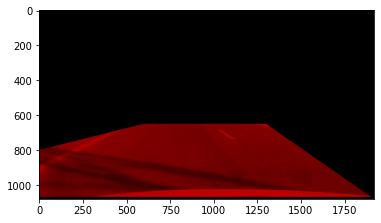

In [62]:
mask = np.zeros_like(image)  
ignore_mask_color = 255 

imshape = image.shape
vertices = np.array([[(0,imshape[0]),(0,800),(600,650), (1300, 650),(imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(image, mask)
plt.imshow(masked_edges)

In [ ]:
import os
os.listdir("/content/drive/MyDrive/Colab Notebooks/Image Processing/test_images")

['solidWhiteRight.jpg',
 'solidYellowLeft.jpg',
 'solidYellowCurve.jpg',
 'solidWhiteCurve.jpg',
 'whiteCarLaneSwitch.jpg',
 '1.jpg',
 '6.jpg',
 'Million_Dollar_Highway.jpg',
 'US Highway 500.jpg',
 '3.jpg',
 'cyclist-a590-cumbria-police.jpg',
 '4.jpg',
 'dashcam.png',
 '2.jpg',
 '5.jpg',
 '10.jpeg',
 '11.jpeg']

## Build a Lane Finding Pipeline



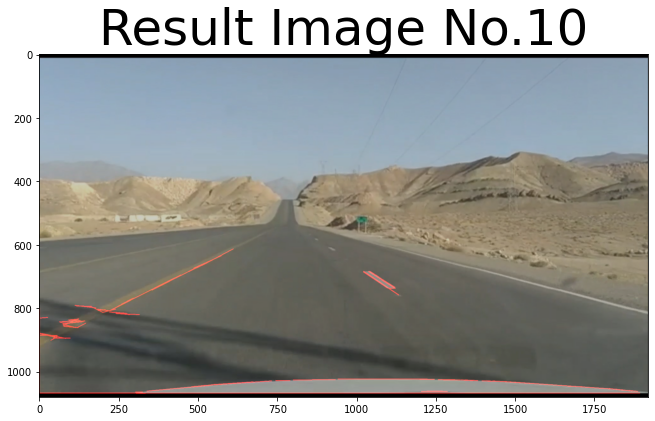

In [49]:
def lanedetection (image, filename):
 gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
 
 # Define a kernel size and apply Gaussian smoothing
 kernel_size = 5
 blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
 
 # Define our parameters for Canny and apply
 low_threshold = 10
 high_threshold = 50
 edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
 
 # Next we'll create a masked edges image using cv2.fillPoly()
 mask = np.zeros_like(edges)   
 ignore_mask_color = 255   
 
 # This time we are defining a four sided polygon to mask
 imshape = image.shape
 vertices = np.array([[(0,imshape[0]),(0,800),(600,600), (1000, 600),(imshape[1],imshape[0])]], dtype=np.int32)
 cv2.fillPoly(mask, vertices, ignore_mask_color)
 masked_edges = cv2.bitwise_and(edges, mask)
 
 # Define the Hough transform parameters
 # Make a blank the same size as our image to draw on
 rho = 1 # distance resolution in pixels of the Hough grid
 theta = np.pi/180 # angular resolution in radians of the Hough grid
 threshold = 10     # minimum number of votes (intersections in Hough grid cell)
 min_line_length =20 #minimum number of pixels making up a line
 max_line_gap = 30   # maximum gap in pixels between connectable line segments
 line_image = np.copy(image)*0 # creating a blank to draw lines on
 
 # Run Hough on edge detected image
 # Output "lines" is an array containing endpoints of detected line segments
 lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                             min_line_length, max_line_gap)
 
 # Iterate over the output "lines" and draw lines on a blank image
 for line in lines:
     for x1,y1,x2,y2 in line:
         cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),2)
 
 # Create a "color" binary image to combine with line image
 color_edges = np.dstack((edges, edges, edges)) 
 
 # Draw the lines on the edge image
 lines_edges = cv2.addWeighted(image, 0.8, line_image, 1, 0) 


 fig = plt.figure(figsize=(24, 9))
 ax1 = fig.add_subplot(1,2,1)
 ax1.set_title('Result Image No.10',fontsize=50)
 plt.imshow(lines_edges)

 
 plt.savefig('/content/drive/MyDrive/Colab Notebooks/Image Processing/test_images_output/'+ filename)



     
filename='f.jpg'
#for filename in os.listdir("test_images/"):

image = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/Image Processing/test_images/'+ filename)

lanedetection(image, filename)    


## Test on Videos


In [17]:
import imageio
imageio.plugins.ffmpeg.download()

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML


Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2269184/45929032 bytes (4.9%)5259264/45929032 bytes (11.5%)8159232/45929032 bytes (17.8%)11042816/45929032 bytes (24.0%)13754368/45929032 bytes (29.9%)16351232/45929032 bytes (35.6%)18751488/45929032 bytes (40.8%)21618688/45929032 bytes (47.1%)24592384/45929032 bytes (53.5%)27475968/45929032 bytes (59.8%)30384128/45929032 bytes (66.2%)33333248/45929032 bytes (72.6%)

In [67]:

def draw_lines(img, lines, color=[255, 0, 0], thickness=10):
  """
  NOTE: this is the function you might want to use as a starting point once you want to 
  average/extrapolate the line segments you detect to map out the full
  extent of the lane (going from the result shown in raw-lines-example.mp4
  to that shown in P1_example.mp4).  
  
  Think about things like separating line segments by their 
  slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
  line vs. the right line.  Then, you can average the position of each of 
  the lines and extrapolate to the top and bottom of the lane.
  
  This function draws `lines` with `color` and `thickness`.	
  Lines are drawn on the image inplace (mutates the image).

  """
  if len(lines)==0:
     return
  # finding the slope of the lines
  sl_thres = 0.5
  slopes= []
  new_lines=[]
  for line in lines:

    x1,y1,x2,y2 = line[0]
    if (x2-x1)!=0.:
     slope = (y2-y1)/(x2-x1)
    else:
     slope = 1

    if abs(slope)> sl_thres:
      slopes.append(slope)
      new_lines.append(line)

  # finding left/right lines based on the slopes and position in image

  right_line=[]
  left_line=[]
  center = img.shape[1]/2
  i=0
  for lin in new_lines:

    x1,y1,x2,y2 = lin[0]
    if slopes[i]>0 and x1 > center  and x2 >center:
      right_line.append(lin)

    if slopes[i]<0 and x1 <center  and x2 <center: 
      left_line.append(lin)

    i=i+1

  right_x=[]
  right_y=[]

  # Avearaging out the slopes and intercepts for each left/right lines

  for line in right_line:
    x1,y1,x2,y2= line[0]
    right_x.append(x1)
    right_x.append(x2)
    right_y.append(y1)
    right_y.append(y2)


  left_x=[]
  left_y=[]

  for line in left_line:
    x1,y1,x2,y2= line[0]
    left_x.append(x1)
    left_x.append(x2)
    left_y.append(y1)
    left_y.append(y2)

  right_m, right_b = np.polyfit(right_x, right_y, 1)
  left_m, left_b = np.polyfit(left_x, left_y, 1)

  # Extrapolation: chosing a y and finding the x using the slopes, intercepts
  box_height = 0.4 # a y distance between two points
  y1 = img.shape[0]
  y2 = img.shape[0] * (1 - box_height)

  right_x1 = (y1 - right_b) / right_m
  right_x2 = (y2 - right_b) / right_m
  
  left_x1 = (y1 - left_b) / left_m
  left_x2 = (y2 - left_b) / left_m


   # Convert calculated end points from float to int
  y1 = int(y1)
  y2 = int(y2)
  right_x1 = int(right_x1)
  right_x2 = int(right_x2)
  left_x1 = int(left_x1)
  left_x2 = int(left_x2)
  
  # Draw the right and left lines on image
  cv2.line(img, (right_x1, y1), (right_x2, y2), color, thickness)
  cv2.line(img, (left_x1, y1), (left_x2, y2), color, thickness)


def process_image(image):
     # NOTE: The output you return should be a color image (3 channel) for processing video below
     # TODO: put your pipeline here,
     # you should return the final output (image where lines are drawn on lanes)
  gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
  
  # Define a kernel size and apply Gaussian smoothing
  kernel_size = 5
  blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
  
  # Define our parameters for Canny and apply
  low_threshold = 50
  high_threshold = 50
  edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
  
  # Next we'll create a masked edges image using cv2.fillPoly()
  mask = np.zeros_like(edges)   
  ignore_mask_color = 255   
  
  # This time we are defining a four sided polygon to mask
  imshape = image.shape
  vertices = np.array([[(0,imshape[0]),(600,650), (1300, 650),(imshape[1],imshape[0])]], dtype=np.int32)
  cv2.fillPoly(mask, vertices, ignore_mask_color)
  masked_edges = cv2.bitwise_and(edges, mask)
  
  # Define the Hough transform parameters
  # Make a blank the same size as our image to draw on
  rho = 1 # distance resolution in pixels of the Hough grid
  theta = np.pi/180 # angular resolution in radians of the Hough grid
  threshold = 10    # minimum number of votes (intersections in Hough grid cell)
  min_line_length =20 #minimum number of pixels making up a line
  max_line_gap = 30   # maximum gap in pixels between connectable line segments
  
  
  # Run Hough on edge detected image
  # Output "lines" is an array containing endpoints of detected line segments
  lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                              min_line_length, max_line_gap)
  
  line_img = np.zeros((*masked_edges.shape, 3), dtype=np.uint8)  # 3-channel RGB image
  draw_lines(line_img, lines)
 
  # Create a "color" binary image to combine with line image
  color_edges = np.dstack((edges, edges, edges)) 
  initial_image = image.astype('uint8')
  # Draw the lines on the edge image
  lines_edges = cv2.addWeighted(initial_image, 0.8, line_img, 1, 0) 
  result = lines_edges
  return result 

In [68]:
white_output = 'final.mp4'

clip1 = VideoFileClip("/content/drive/MyDrive/Colab Notebooks/Image Processing/test_videos/final.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile("/content/drive/MyDrive/Colab Notebooks/Image Processing/"+white_output, audio=False)

[MoviePy] >>>> Building video /content/drive/MyDrive/Colab Notebooks/Image Processing/final.mp4
[MoviePy] Writing video /content/drive/MyDrive/Colab Notebooks/Image Processing/final.mp4







  0%|          | 0/228 [00:00<?, ?it/s]




  1%|          | 2/228 [00:00<00:17, 12.91it/s]




  2%|▏         | 4/228 [00:00<00:17, 12.73it/s]




  3%|▎         | 6/228 [00:00<00:17, 12.69it/s]




  4%|▎         | 8/228 [00:00<00:17, 12.58it/s]




  4%|▍         | 10/228 [00:00<00:17, 12.77it/s]




  5%|▌         | 12/228 [00:00<00:16, 12.91it/s]




  6%|▌         | 14/228 [00:01<00:16, 12.93it/s]




  7%|▋         | 16/228 [00:01<00:16, 12.98it/s]

TypeError: ignored